In [1]:
import pandas as pd
import os
from torch.utils.tensorboard import SummaryWriter

In [2]:
current_dir = os.getcwd()

# read_path = ['models_v'+ str(i) for i in range(1,4)]


In [3]:
# model_df1 = pd.read_csv(os.path.join(current_dir, read_path[0], 'model_df.csv'))
# model_df1

In [4]:
# model1= 'norestart_noweightclamp'
# weights = list(model_df1['weight'].unique())
# for weight in weights:
#     run_dir =os.path.join(current_dir,'runs', model1 + f'_weight_{weight}')
#     os.makedirs(run_dir, exist_ok=True)
#     writer = SummaryWriter(log_dir=run_dir)
#     df_weight = model_df1[model_df1['weight'] == weight]
#     for index, row in df_weight.iterrows():
#         epoch = row['epoch']
#         val_acc = row['acc']
#         val_precision = row['precision']
#         val_recall = row['recall']
#         writer.add_scalar('Acc/val', val_acc, epoch)
#         writer.add_scalar('Precision/val', val_precision, epoch)
#         writer.add_scalar('Recall/val', val_recall, epoch)
            
#     writer.close()

In [5]:
# model_df2 = pd.read_csv(os.path.join(current_dir, read_path[1], 'model_df.csv'))
# model_df2

In [6]:
# model2= 'restart_noweightclamp'
# weights = list(model_df2['weight'].unique())
# for weight in weights:
#     run_dir =os.path.join(current_dir,'runs', model2 + f'_weight_{weight}')
#     os.makedirs(run_dir, exist_ok=True)
#     writer = SummaryWriter(log_dir=run_dir)
#     df_weight = model_df2[model_df2['weight'] == weight]
#     for index, row in df_weight.iterrows():
#         epoch = row['epoch']
#         val_acc = row['acc']
#         val_precision = row['precision']
#         val_recall = row['recall']
#         writer.add_scalar('Acc/val', val_acc, epoch)
#         writer.add_scalar('Precision/val', val_precision, epoch)
#         writer.add_scalar('Recall/val', val_recall, epoch)
            
#     writer.close()

In [7]:
# model_df3 = pd.read_csv(os.path.join(current_dir, read_path[2], 'model_df.csv'))
# model_df3

In [8]:
# model3= 'restart_logitsclamp_weightclamp'
# weights = list(model_df3['weight'].unique())
# for weight in weights:
#     run_dir =os.path.join(current_dir,'runs', model3 + f'_weight_{weight}')
#     os.makedirs(run_dir, exist_ok=True)
#     writer = SummaryWriter(log_dir=run_dir)
#     df_weight = model_df3[model_df3['weight'] == weight]
#     for index, row in df_weight.iterrows():
#         epoch = row['epoch']
#         val_acc = row['acc']
#         val_precision = row['precision']
#         val_recall = row['recall']
#         writer.add_scalar('Acc/val', val_acc, epoch)
#         writer.add_scalar('Precision/val', val_precision, epoch)
#         writer.add_scalar('Recall/val', val_recall, epoch)
            
#     writer.close()

In [9]:
model_names = []
for dir in os.listdir(os.path.join(current_dir)):
    dir = str(dir)
    if dir.endswith('.py'):
        model_names.append(dir.replace('.py',''))
model_names

['model_training-v2_restart_noweightclamp',
 'model_training-v3_restart_weightclamp',
 'model_training-v5_restart_focalloss']

In [11]:
model_dirs = ['models_v'+ str(i) for i in [2,3,5]]
model_sum_df = pd.DataFrame(columns= ['model_name','model_with_parameter' ,'weight', 'epoch','alpha', 'acc', 'precision', 'recall', 'path'])
for i , model_dir in enumerate(model_dirs):
    model_df = pd.read_csv(os.path.join(current_dir, model_dir, 'model_df.csv'))
    model_name = model_names[i]
    for index, row in model_df.iterrows():
        where_epoch = row['Model'].find('_epoch')
        parameter = row['Model'][0:where_epoch]
        model_with_parameter = model_name + '_' + parameter
        if 'weight' in row:
            weight = row['weight']
        else:
            weight = 'None'
        if 'alpha' in row:
            alpha = row['alpha']
        else:
            alpha = 'None'
        path = os.path.join(model_dir, row['Model'])
        model_sum_df.loc[len(model_sum_df)] = [model_name, model_with_parameter,weight, row['epoch'], alpha, row['acc'], row['precision'], row['recall'], path]
model_sum_df

,model_name,model_with_parameter,weight,epoch,alpha,acc,precision,recall,path
0,model_training-v2_restart_noweightclamp,model_training-v2_restart_noweightclamp_weight_0,0.0,0,None,0.921075,0.703797,0.307519,models_v2\weight_0_epoch00_acc0.9211_prec0.703...
1,model_training-v2_restart_noweightclamp,model_training-v2_restart_noweightclamp_weight_0,0.0,1,None,0.923754,0.724456,0.332432,models_v2\weight_0_epoch01_acc0.9238_prec0.724...
2,model_training-v2_restart_noweightclamp,model_training-v2_restart_noweightclamp_weight_0,0.0,2,None,0.926483,0.747556,0.353927,models_v2\weight_0_epoch02_acc0.9265_prec0.747...
3,model_training-v2_restart_noweightclamp,model_training-v2_restart_noweightclamp_weight_0,0.0,3,None,0.926646,0.746329,0.357684,models_v2\weight_0_epoch03_acc0.9266_prec0.746...
4,model_training-v2_restart_noweightclamp,model_training-v2_restart_noweightclamp_weight_0,0.0,4,None,0.928996,0.781909,0.361385,models_v2\weight_0_epoch04_acc0.9290_prec0.781...
...,...,...,...,...,...,...,...,...,...
695,model_training-v5_restart_focalloss,model_training-v5_restart_focalloss_alpha_0.75,None,45,0.75,0.897176,0.468343,0.523691,models_v5\alpha_0.75_epoch45_acc0.8972_prec0.4...
696,model_training-v5_restart_focalloss,model_training-v5_restart_focalloss_alpha_0.75,None,46,0.75,0.893875,0.455090,0.532880,models_v5\alpha_0.75_epoch46_acc0.8939_prec0.4...
697,model_training-v5_restart_focalloss,model_training-v5_restart_focalloss_alpha_0.75,None,47,0.75,0.898004,0.471454,0.513427,models_v5\alpha_0.75_epoch47_acc0.8980_prec0.4...
698,model_training-v5_restart_focalloss,model_training-v5_restart_focalloss_alpha_0.75,None,48,0.75,0.897064,0.467640,0.519946,models_v5\alpha_0.75_epoch48_acc0.8971_prec0.4...


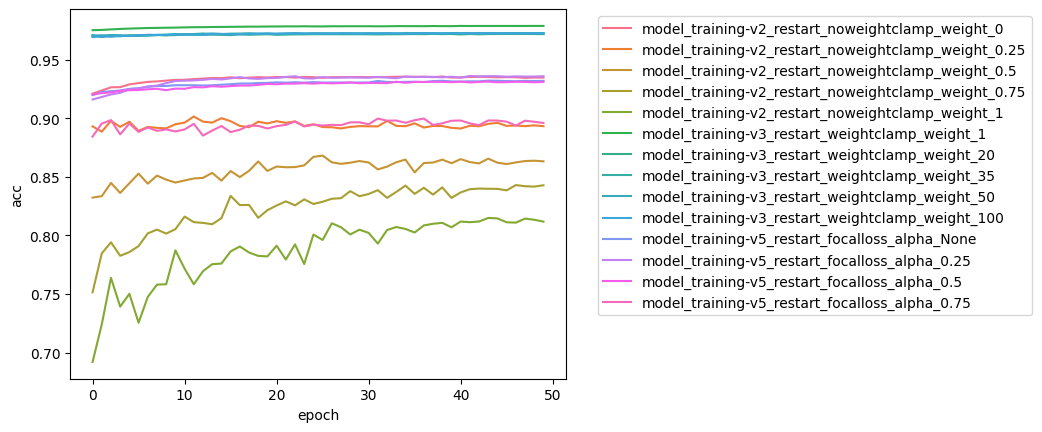

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(data=model_sum_df, x='epoch', y='acc', hue='model_with_parameter')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


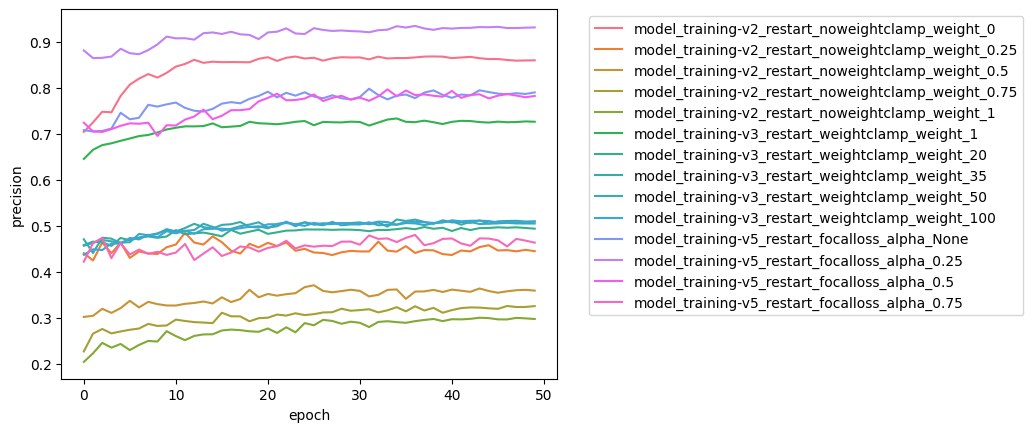

In [13]:
sns.lineplot(data=model_sum_df, x='epoch', y='precision', hue='model_with_parameter')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


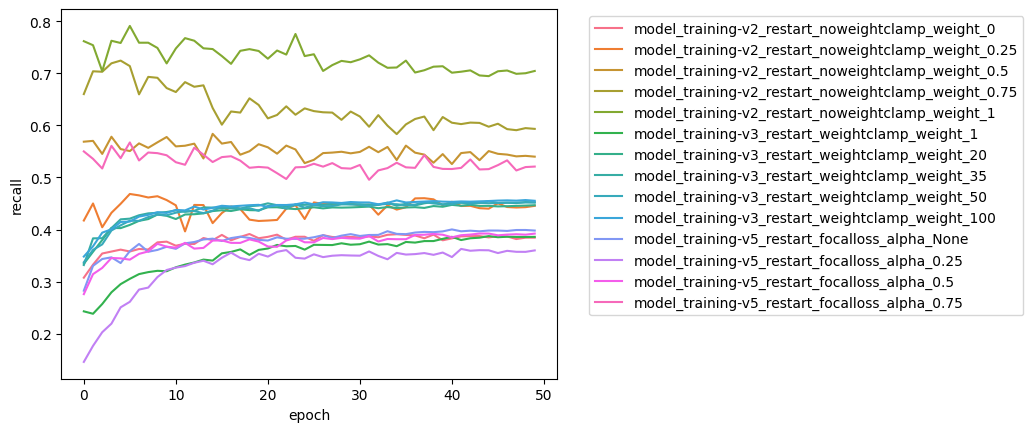

In [14]:
sns.lineplot(data=model_sum_df, x='epoch', y='recall', hue='model_with_parameter')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [15]:
model_converged = model_sum_df[model_sum_df['epoch']>30].copy()
model_converged

,model_name,model_with_parameter,weight,epoch,alpha,acc,precision,recall,path
31,model_training-v2_restart_noweightclamp,model_training-v2_restart_noweightclamp_weight_0,0.0,31,None,0.935137,0.861328,0.386816,models_v2\weight_0_epoch31_acc0.9351_prec0.861...
32,model_training-v2_restart_noweightclamp,model_training-v2_restart_noweightclamp_weight_0,0.0,32,None,0.935291,0.867129,0.385163,models_v2\weight_0_epoch32_acc0.9353_prec0.867...
33,model_training-v2_restart_noweightclamp,model_training-v2_restart_noweightclamp_weight_0,0.0,33,None,0.935474,0.863140,0.389864,models_v2\weight_0_epoch33_acc0.9355_prec0.863...
34,model_training-v2_restart_noweightclamp,model_training-v2_restart_noweightclamp_weight_0,0.0,34,None,0.935615,0.864169,0.390972,models_v2\weight_0_epoch34_acc0.9356_prec0.864...
35,model_training-v2_restart_noweightclamp,model_training-v2_restart_noweightclamp_weight_0,0.0,35,None,0.935506,0.864154,0.389636,models_v2\weight_0_epoch35_acc0.9355_prec0.864...
...,...,...,...,...,...,...,...,...,...
695,model_training-v5_restart_focalloss,model_training-v5_restart_focalloss_alpha_0.75,None,45,0.75,0.897176,0.468343,0.523691,models_v5\alpha_0.75_epoch45_acc0.8972_prec0.4...
696,model_training-v5_restart_focalloss,model_training-v5_restart_focalloss_alpha_0.75,None,46,0.75,0.893875,0.455090,0.532880,models_v5\alpha_0.75_epoch46_acc0.8939_prec0.4...
697,model_training-v5_restart_focalloss,model_training-v5_restart_focalloss_alpha_0.75,None,47,0.75,0.898004,0.471454,0.513427,models_v5\alpha_0.75_epoch47_acc0.8980_prec0.4...
698,model_training-v5_restart_focalloss,model_training-v5_restart_focalloss_alpha_0.75,None,48,0.75,0.897064,0.467640,0.519946,models_v5\alpha_0.75_epoch48_acc0.8971_prec0.4...


In [16]:
acc_summary = model_converged[['model_with_parameter','acc']].groupby('model_with_parameter').mean().sort_values('acc',ascending=False)
acc_summary

,acc
model_with_parameter,
model_training-v3_restart_weightclamp_weight_1,0.978793
model_training-v3_restart_weightclamp_weight_100,0.972628
model_training-v3_restart_weightclamp_weight_35,0.972627
model_training-v3_restart_weightclamp_weight_50,0.972464
model_training-v3_restart_weightclamp_weight_20,0.971900
model_training-v5_restart_focalloss_alpha_0.25,0.935481
model_training-v2_restart_noweightclamp_weight_0,0.935199
model_training-v5_restart_focalloss_alpha_None,0.931627
model_training-v5_restart_focalloss_alpha_0.5,0.930916


In [17]:
precision_summary = model_converged[['model_with_parameter','acc','precision','recall']].groupby('model_with_parameter').mean().sort_values('precision',ascending=False)
precision_summary

,acc,precision,recall
model_with_parameter,,,
model_training-v5_restart_focalloss_alpha_0.25,0.935481,0.929086,0.355229
model_training-v2_restart_noweightclamp_weight_0,0.935199,0.863590,0.386189
model_training-v5_restart_focalloss_alpha_None,0.931627,0.785967,0.395796
model_training-v5_restart_focalloss_alpha_0.5,0.930916,0.783298,0.387954
model_training-v3_restart_weightclamp_weight_1,0.978793,0.725681,0.380298
model_training-v3_restart_weightclamp_weight_35,0.972627,0.508227,0.450369
model_training-v3_restart_weightclamp_weight_100,0.972628,0.508152,0.453811
model_training-v3_restart_weightclamp_weight_50,0.972464,0.504873,0.449742
model_training-v3_restart_weightclamp_weight_20,0.971900,0.493547,0.444395


In [18]:
max_precision_model = precision_summary['precision'].idxmax()
max_precision_model

'model_training-v5_restart_focalloss_alpha_0.25'

In [19]:
recall_summary = precision_summary.sort_values('recall',ascending=False)
recall_summary

,acc,precision,recall
model_with_parameter,,,
model_training-v2_restart_noweightclamp_weight_1,0.809271,0.294833,0.707837
model_training-v2_restart_noweightclamp_weight_0.75,0.838898,0.319926,0.601475
model_training-v2_restart_noweightclamp_weight_0.5,0.862004,0.356910,0.544309
model_training-v5_restart_focalloss_alpha_0.75,0.897105,0.468041,0.520222
model_training-v3_restart_weightclamp_weight_100,0.972628,0.508152,0.453811
model_training-v3_restart_weightclamp_weight_35,0.972627,0.508227,0.450369
model_training-v3_restart_weightclamp_weight_50,0.972464,0.504873,0.449742
model_training-v2_restart_noweightclamp_weight_0.25,0.893811,0.447151,0.446191
model_training-v3_restart_weightclamp_weight_20,0.971900,0.493547,0.444395


In [20]:
max_recall_model = recall_summary['recall'].idxmax()
max_recall_model

'model_training-v2_restart_noweightclamp_weight_1'

In [ ]:
print('best model for precision:', max_precision_model, 'with precision of', precision_summary.loc[max_precision_model]['precision'], ', recall: ' ,  recall_summary.loc[max_precision_model]['recall'], ', acc: ', acc_summary.loc[max_precision_model]['acc']),print('best model for recall:', max_recall_model, 'with recall of', recall_summary.loc[max_recall_model]['recall'], 'precision: ', precision_summary.loc[max_recall_model]['precision'], ', acc: ', acc_summary.loc[max_recall_model]['acc'])

best model for precision: model_training-v5_restart_focalloss_alpha_0.25 with precision of 0.9117257587860198 , recall:  0.399819047481119 , acc:  0.9318433777685511
best model for recall: model_training-v2_restart_noweightclamp_weight_0.75 with recall of 0.618323238226737 precision:  0.34901127209039196 , acc:  0.8361422148010617


(None, None)

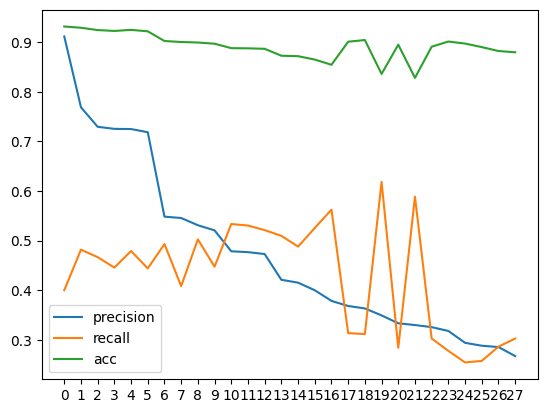

In [ ]:
plt.plot(precision_summary.index, precision_summary[['precision','recall','acc']], label=['precision','recall','acc'])
plt.xticks(ticks= [i for i in range(len(precision_summary.index))],labels = [i for i in range(len(precision_summary.index))])
plt.legend()
plt.show()

In [21]:
# find the balanced model
def find_balance(row):
    if row['precision'] > row['recall'] :
        return row['recall'] / row['precision']
    elif row['recall'] > row['precision'] :
        return row['precision'] / row['recall']
    else:
        return 1.0

model_converged['p_r_ratio'] = model_converged.apply(find_balance, axis=1)

model_converged = model_converged.sort_values('p_r_ratio', ascending=False)
model_converged.head(10)

,model_name,model_with_parameter,weight,epoch,alpha,acc,precision,recall,path,p_r_ratio
83,model_training-v2_restart_noweightclamp,model_training-v2_restart_noweightclamp_weight...,0.25,33,None,0.893587,0.445957,0.446297,models_v2\weight_0.25_epoch33_acc0.8936_prec0....,0.999238
99,model_training-v2_restart_noweightclamp,model_training-v2_restart_noweightclamp_weight...,0.25,49,None,0.893335,0.444700,0.445482,models_v2\weight_0.25_epoch49_acc0.8933_prec0....,0.998244
91,model_training-v2_restart_noweightclamp,model_training-v2_restart_noweightclamp_weight...,0.25,41,None,0.893651,0.446130,0.445163,models_v2\weight_0.25_epoch41_acc0.8937_prec0....,0.997832
92,model_training-v2_restart_noweightclamp,model_training-v2_restart_noweightclamp_weight...,0.25,42,None,0.893251,0.444318,0.445554,models_v2\weight_0.25_epoch42_acc0.8933_prec0....,0.997226
97,model_training-v2_restart_noweightclamp,model_training-v2_restart_noweightclamp_weight...,0.25,47,None,0.893343,0.444380,0.442292,models_v2\weight_0.25_epoch47_acc0.8933_prec0....,0.995301
96,model_training-v2_restart_noweightclamp,model_training-v2_restart_noweightclamp_weight...,0.25,46,None,0.893885,0.447011,0.443201,models_v2\weight_0.25_epoch46_acc0.8939_prec0....,0.991476
81,model_training-v2_restart_noweightclamp,model_training-v2_restart_noweightclamp_weight...,0.25,31,None,0.893146,0.444107,0.447977,models_v2\weight_0.25_epoch31_acc0.8931_prec0....,0.991359
95,model_training-v2_restart_noweightclamp,model_training-v2_restart_noweightclamp_weight...,0.25,45,None,0.893554,0.446226,0.450260,models_v2\weight_0.25_epoch45_acc0.8936_prec0....,0.991041
98,model_training-v2_restart_noweightclamp,model_training-v2_restart_noweightclamp_weight...,0.25,48,None,0.894028,0.447659,0.442927,models_v2\weight_0.25_epoch48_acc0.8940_prec0....,0.989429
84,model_training-v2_restart_noweightclamp,model_training-v2_restart_noweightclamp_weight...,0.25,34,None,0.893295,0.443704,0.438272,models_v2\weight_0.25_epoch34_acc0.8933_prec0....,0.987756


In [ ]:
# coppy the best model to current directory for easy access
import shutil
balance_model = model_converged.iloc[1]
shutil.copyfile(os.path.join(current_dir, balance_model['path']), os.path.join(current_dir, 'best_model', 'balance_model_'+balance_model['model_with_parameter']+'_'+str(balance_model['epoch'])+'.pth'))
best_precision_model = model_converged[model_converged['model_with_parameter'] == max_precision_model].sort_values('precision', ascending=False).iloc[0]
shutil.copyfile(os.path.join(current_dir, best_precision_model['path']), os.path.join(current_dir, 'best_model', 'best_precision_model_'+best_precision_model['model_with_parameter']+'_'+str(best_precision_model['epoch'])+'.pth'))
best_recall_model = model_converged[model_converged['model_with_parameter'] == max_recall_model].sort_values('recall', ascending=False).iloc[0]
shutil.copyfile(os.path.join(current_dir, best_recall_model['path']), os.path.join(current_dir, 'best_model','best_recall_model_'+best_recall_model['model_with_parameter']+'_'+str(best_recall_model['epoch'])+'.pth'))

'c:\\Users\\yeech\\Documents\\Project\\low-dense-low-rise\\best_model\\best_recall_model_model_training-v2_restart_noweightclamp_weight_0.75_31.pth'

In [ ]:
model_sum_df.to_csv(os.path.join(current_dir, 'model_summary.csv'), index=False)